In [1]:

import os
import numpy as np
import pandas as pd
from PIL import Image
import io
import re

import tensorflow as tf
from tensorflow import keras

# The Google Cloud Notebook product has specific requirements
IS_GOOGLE_CLOUD_NOTEBOOK = os.path.exists("/opt/deeplearning/metadata/env_version")

# Google Cloud Notebook requires dependencies to be installed with '--user'
USER_FLAG = ""
if IS_GOOGLE_CLOUD_NOTEBOOK:
    USER_FLAG = "--user"

PROJECT_ID = ""

if not os.getenv("IS_TESTING"):
    # Get your Google Cloud project ID from gcloud
    shell_output=!gcloud config list --format 'value(core.project)' 2>/dev/null
    PROJECT_ID = shell_output[0]
    print("Project ID: ", PROJECT_ID)
if PROJECT_ID == "" or PROJECT_ID is None:
    PROJECT_ID = "bigbucket"  # @param {type:"string"}
from datetime import datetime
from google.colab import auth
auth.authenticate_user()
!echo "deb http://packages.cloud.google.com/apt gcsfuse-`lsb_release -c -s` main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
!sudo apt-get -y -q update
!sudo apt-get -y -q install gcsfuse
!mkdir -p mush
!mkdir -p inat
bucket_name='medium_mush'
bucket_name2='inatdatabase'
!gcsfuse --implicit-dirs --limit-bytes-per-sec -1 --limit-ops-per-sec -1 {bucket_name} mush
!gcsfuse --implicit-dirs --limit-bytes-per-sec -1 --limit-ops-per-sec -1 {bucket_name2} inat

Project ID:  
deb http://packages.cloud.google.com/apt gcsfuse-bionic main
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  70472      0 --:--:-- --:--:-- --:--:-- 70472
OK
Hit:1 http://packages.cloud.google.com/apt gcsfuse-bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu

In [2]:
%cd /content/mush/yolov5
#git clone https://github.com/ultralytics/yolov5  # clone
%pip install -qr requirements.txt  # install

import torch
import utils
#display = utils.notebook_init()  # checks

/content/mush/yolov5
     |████████████████████████████████| 596 kB 14.6 MB/s 


In [ ]:
!python train.py --img 416 --batch 16 --epochs 30 --data /content/mush/Mushrooms.yaml --cfg ./models/yolov5s.yaml --weights  /content/mush/yolo/ --name yolov5s_results  --cache --device 0

python3: can't open file 'detect.py': [Errno 2] No such file or directory


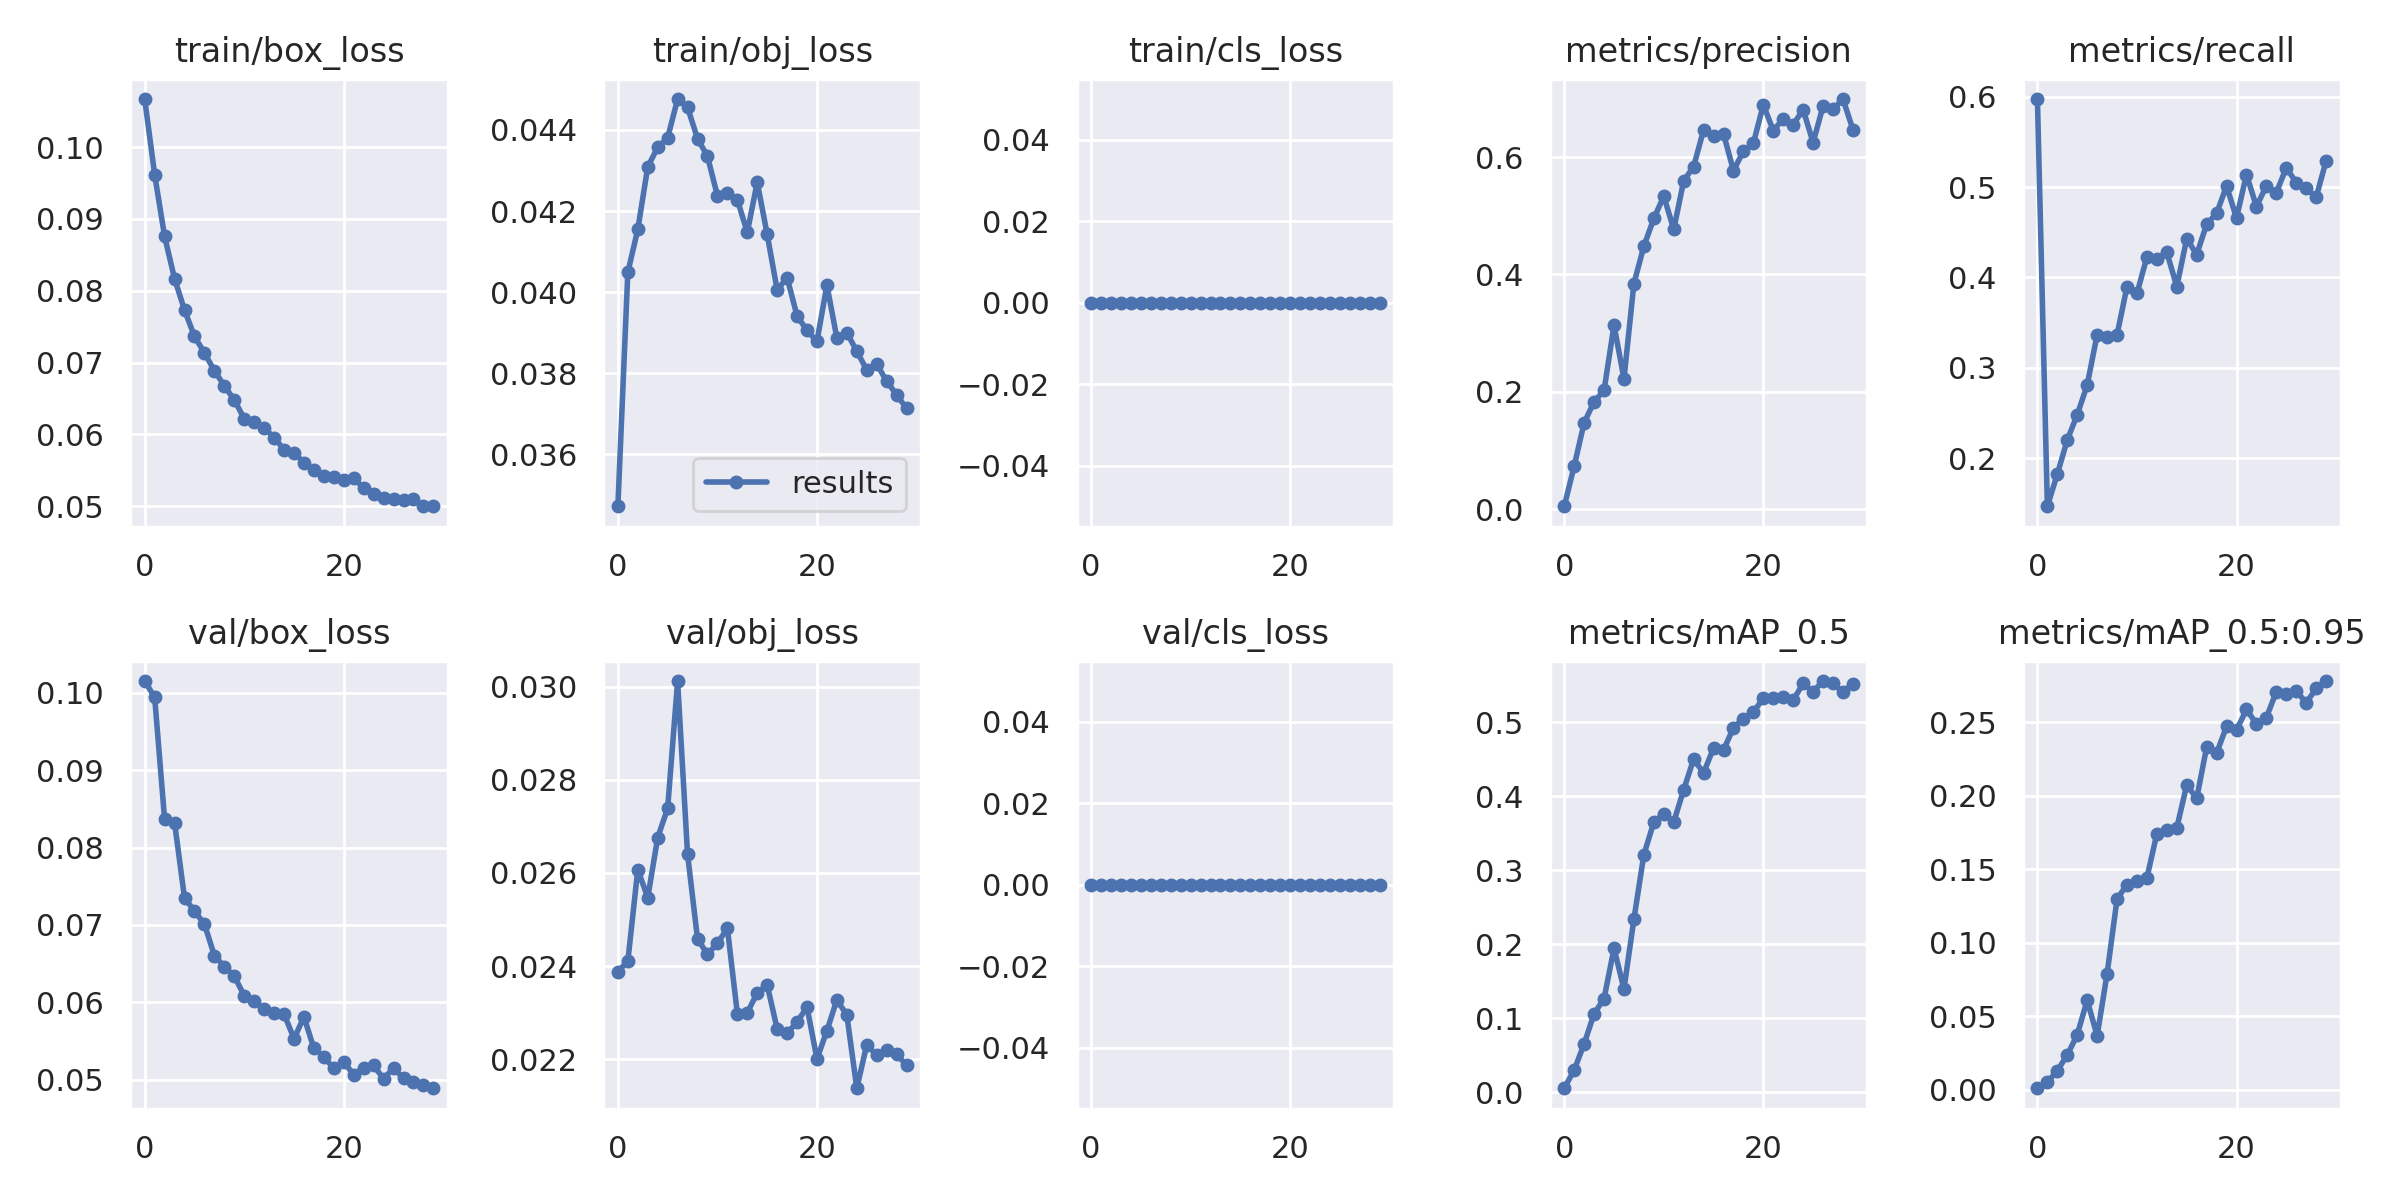

In [ ]:
Image.open('/content/yolov5/runs/train/yolov5s_results/results.png')

In [3]:
# morels = !gsutil ls gs://medium_mush/fungi/images/inat/morel_inat
gyro = !gsutil ls gs://medium_mush/fungi/images/inat/gyro_MO

In [ ]:
morels = [s.replace('gs://inatdatabase/', '/content/inat/') for s in morels]
others = [s.replace('gs://inatdatabase/', '/content/inat/') for s in others]
gyro = [s.replace('gs://inatdatabase/', '/content/inat/') for s in gyro]

In [ ]:
print(len(ascos), len(gyro), len(basidios), len(morels))

283 1042 178 1524


In [ ]:
import pickle
def serialize(file, path):
    with open(path, 'wb') as f:
        pickle.dump(file, f)

In [ ]:
serialize(img2, '/content/mush/img2.pkl')
serialize(img3, '/content/mush/img3.pkl')
serialize(img4, '/content/mush/img4.pkl')

In [ ]:
import pickle
with open('/content/mush/img2.pkl', 'rb') as f:
    img2 = pickle.load(f)
img2 = [s.replace('gs://medium_mush/', '/content/mush/') for s in img2]

In [3]:
#for file in ascos[1:]:
!python detect.py --save-crop --weights /content/mush/yolov5/runs/train/yolov5s_results/weights/best.pt --source /content/inat/MO/gyro/inat --conf 0.25 --exist-ok --project /content/mush/fungi/images/inat --name gyro_inat

detect: weights=['/content/mush/yolov5/runs/train/yolov5s_results/weights/best.pt'], source=/content/inat/MO/gyro/inat, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/mush/fungi/images/inat, name=gyro_inat, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-202-g7d46c69 Python-3.7.13 torch-1.11.0+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/454 /content/inat/MO/gyro/inat/103original.jpeg: 480x640 2 Mushrooms, Done. (0.135s)
image 2/454 /content/inat/MO/gyro/inat/104original.jpeg: 480x640 Done. (0.110s)
image 3/454 /content/inat/MO/gyro/inat/1053original.jpeg: 640x512 Done. (0.128s)
image 4/454 /content/inat/MO/gyro/inat/1054original.jpeg: 544x64

In [ ]:
img2.index

In [ ]:
import pickle
def save_list(list, path):
    with open(path, 'wb') as f:
        pickle.dump(list, f)
ascos = !gsutil ls gs://inatdatabase/MO/ascos
basidios = !gsutil ls gs://inatdatabase/MO/basidios
gyro = !gsutil ls gs://inatdatabase/MO/gyro/MO
morels = !gsutil ls gs://inatdatabase/MO/morels/MO
save_list(ascos[1:], '/content/inat/ascolist.pkl')
save_list(basidios[1:], '/content/inat/basidioslist.pkl')
save_list(gyro[1:], '/content/inat/gyrolist.pkl')
save_list(morels[1:], '/content/inat/morellist.pkl')

In [ ]:
save_list(ascos[1:], '/content/inat/ascolist.pkl')
save_list(basidios[1:], '/content/inat/basidioslist.pkl')
save_list(gyro[1:], '/content/inat/gyrolist.pkl')
save_list(morels[1:], '/content/inat/morellist.pkl')

In [ ]:
import pickle
def save_list(list, path):
    with open(path, 'wb') as f:
        pickle.dump(list, f)

In [ ]:
import pickle
def load_list(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [ ]:
morels = load_list('/content/inat/morellist.pkl')
morels = [s.replace('gs://inatdatabase', '/content/inat') for s in basidios]


In [ ]:
big_list = !gsutil ls gs://medium_mush/fungi/images/crops

In [ ]:
newlist = []
for file in big_list:
    newfile = file.lower()
    newlist.append(newfile)

In [ ]:
big_list

['gs://medium_mush/fungi/images/crops/cropped044TR2009PIC35216240.jpg',
 'gs://medium_mush/fungi/images/crops/cropped044TR2009PIC352162402.jpg',
 'gs://medium_mush/fungi/images/crops/croppedA.H2017-9227767_r1DFUUM6Z.jpg',
 'gs://medium_mush/fungi/images/crops/croppedAA2017-9187386_HJy3P_eqg.jpg',
 'gs://medium_mush/fungi/images/crops/croppedAA2017-9187386_HJy3P_eqg2.jpg',
 'gs://medium_mush/fungi/images/crops/croppedAA2017-9187386_HJy3P_eqg3.jpg',
 'gs://medium_mush/fungi/images/crops/croppedAA2017-9187424_B1cjFie9e.jpg',
 'gs://medium_mush/fungi/images/crops/croppedAA2017-9194215_B1xY64pSMW.jpg',
 'gs://medium_mush/fungi/images/crops/croppedACE2017-9212107_HJlEbVys9W.jpg',
 'gs://medium_mush/fungi/images/crops/croppedACE2017-9212107_HJlEbVys9W2.jpg',
 'gs://medium_mush/fungi/images/crops/croppedACE2017-9212107_HJlEbVys9W3.jpg',
 'gs://medium_mush/fungi/images/crops/croppedACE2017-9212107_HJlEbVys9W4.jpg',
 'gs://medium_mush/fungi/images/crops/croppedACE2017-9212107_HyN-E1jcZ.jpg',
 'g

In [ ]:
trainbig = pd.read_csv('/content/mush/fungi/training_annot.csv')
valbig=pd.read_csv('/content/mush/fungi/val_annot.csv')

In [ ]:
trainbig['test'] = trainbig['file_name'].apply(lambda x: x.split('/')[-1])
valbig['test'] = valbig['file_name'].apply(lambda x: x.split('/')[-1])

In [ ]:
trainbig['test'] = trainbig['test'].apply(lambda x: ('gs://medium_mush/fungi/images/crops/cropped'+ x).lower())
valbig['test'] = valbig['test'].apply(lambda x: ('gs://medium_mush/fungi/images/crops/cropped'+ x).lower())

In [ ]:
trainbig = trainbig[trainbig['test'].isin(newlist)]
valbig = valbig[valbig['test'].isin(newlist)]

In [9]:
# df = pd.concat([trainbig, valbig], axis=0)
# df.to_csv('/content/mush/INVENTORY.csv', index=False)
df = pd.read_csv('/content/mush/INVENTORY.csv')

In [ ]:
df['file_name'] = df['image_name'].apply(lambda x: 'gs://medium_mush/fungi/images/crops/cropped' + (x[:-3])+'jpg').values

In [ ]:
val = df.sample(frac=0.15)
train = df[~df.index.isin(val.index)]

In [ ]:
dels = train[~train['category_id'].isin(val['category_id'].values.tolist())]
train = train[~train['category_id'].isin(dels['category_id'].values.tolist())]
val = val[val['category_id'].isin(train['category_id'].values.tolist())]

In [ ]:
print(len(val['category_id'].unique()), len(train['category_id'].unique()))

358 358


In [ ]:
train[train['name'].str.contains('Morchella')]

,id_x,file_name,width,license,rights_holder,height,category_id,name,supercategory,image_name,subdir,freq,test


In [4]:
basidios_MO = !gsutil ls gs://medium_mush/fungi/images/inat/basidios
gyro_MO = !gsutil ls gs://medium_mush/fungi/images/inat/gyro_MO
gyro_inat = !gsutil ls gs://medium_mush/fungi/images/inat/gyro_inat
ascos_MO = !gsutil ls gs://medium_mush/fungi/images/inat/ascos_MO
morel_inat = !gsutil ls gs://medium_mush/fungi/images/inat/morel_inat
morels_MO = !gsutil ls gs://medium_mush/fungi/images/inat/morels_MO

In [5]:
# basidios = pd.DataFrame(basidios_MO)
gyro_MO = pd.DataFrame(gyro_MO)
gyro_inat = pd.DataFrame(gyro_inat)
# ascos = pd.DataFrame(ascos_MO)
morel_inat = pd.DataFrame(morel_inat)
morel_MO = pd.DataFrame(morels_MO)

In [6]:
#basidios['supercategory'] = '2'
gyro_MO['supercategory'] = '1'
gyro_inat['supercategory'] = '1'
#ascos['supercategory'] = '2'
morel_inat['supercategory'] = '0'
morel_MO['supercategory'] = '0'


In [11]:
morel_inat

,0,supercategory
0,gs://medium_mush/fungi/images/inat/morel_inat/,0
1,gs://medium_mush/fungi/images/inat/morel_inat/...,0
2,gs://medium_mush/fungi/images/inat/morel_inat/...,0
3,gs://medium_mush/fungi/images/inat/morel_inat/...,0
4,gs://medium_mush/fungi/images/inat/morel_inat/...,0
...,...,...
698,gs://medium_mush/fungi/images/inat/morel_inat/...,0
699,gs://medium_mush/fungi/images/inat/morel_inat/...,0
700,gs://medium_mush/fungi/images/inat/morel_inat/...,0
701,gs://medium_mush/fungi/images/inat/morel_inat/...,0


In [35]:
basidios.drop(columns='cat', inplace=True)
gyro_MO.drop(columns='cat', inplace=True)
ascos.drop(columns='cat', inplace=True)
morel_inat.drop(columns='cat', inplace=True)
morel_MO.drop(columns='cat', inplace=True)

In [10]:
print( len(gyro_MO),len(gyro_inat),  len(morel_inat), len(morel_MO))

1236 525 703 1870


In [12]:
#basidios = basidios.iloc[1:, :]
gyro_MO = gyro_MO.iloc[1:, :]
gyro_inat = gyro_inat.iloc[1:, :]
#ascos = ascos.iloc[1:, :]
morel_inat = morel_inat.iloc[1:, :]
morel_MO = morel_MO.iloc[1:, :]

In [13]:
dfnew =pd.concat([morel_MO, gyro_MO, morel_inat, gyro_inat], axis=0)

In [14]:
dfnew = dfnew.rename(columns={0: 'file_name'})

In [ ]:
df = pd.read_csv('/content/mush/INVENTORY.csv')

In [51]:
dfnew

,id_x,file_name,width,license,rights_holder,height,category_id,name,supercategory,image_name,subdir,freq,test,0
4124,12392.0,images/10056_Agaricus_arvensis/PEL2009PIC41326...,640.0,1.0,Peter Lausted,480.0,3.0,Agaricus arvensis,Agaricus,PEL2009PIC41326678.JPG,10056_Agaricus_arvensis/PEL2009PIC41326678.JPG,225.0,gs://medium_mush/fungi/images/crops/croppedpel...,NaN
4125,12393.0,images/10056_Agaricus_arvensis/PEL2009PIC10506...,640.0,1.0,Peter Lausted,480.0,3.0,Agaricus arvensis,Agaricus,PEL2009PIC10506376.JPG,10056_Agaricus_arvensis/PEL2009PIC10506376.JPG,225.0,gs://medium_mush/fungi/images/crops/croppedpel...,NaN
4126,12394.0,images/10056_Agaricus_arvensis/PEL2009PIC27292...,640.0,1.0,Peter Lausted,480.0,3.0,Agaricus arvensis,Agaricus,PEL2009PIC27292187.JPG,10056_Agaricus_arvensis/PEL2009PIC27292187.JPG,225.0,gs://medium_mush/fungi/images/crops/croppedpel...,NaN
4127,20254.0,images/10056_Agaricus_arvensis/PEL2010PIC33771...,640.0,1.0,Peter Lausted,480.0,3.0,Agaricus arvensis,Agaricus,PEL2010PIC33771359.JPG,10056_Agaricus_arvensis/PEL2010PIC33771359.JPG,225.0,gs://medium_mush/fungi/images/crops/croppedpel...,NaN
4128,12209.0,images/10057_Agaricus_augustus/JM2009PIC756703...,1500.0,1.0,Jens Mårbjerg,1125.0,4.0,Agaricus augustus,Agaricus,JM2009PIC75670378.JPG,10057_Agaricus_augustus/JM2009PIC75670378.JPG,125.0,gs://medium_mush/fungi/images/crops/croppedjm2...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,gs://medium_mush/fungi/images/inat/morel_inat/...
699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,gs://medium_mush/fungi/images/inat/morel_inat/...
700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,gs://medium_mush/fungi/images/inat/morel_inat/...
701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,gs://medium_mush/fungi/images/inat/morel_inat/...


In [ ]:
df.groupby('category_id')['category_id'].count() > 100

In [ ]:
tmp = size[size>100]
df = df[df['category_id'].isin(size)].sort_values(by='category_id')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['supercategory'] = le.fit_transform(train['supercategory'])
val['supercategory'] = le.transform(val['supercategory'])

In [16]:
dfnew

,file_name,supercategory
1,gs://medium_mush/fungi/images/inat/morels_MO/c...,0
2,gs://medium_mush/fungi/images/inat/morels_MO/c...,0
3,gs://medium_mush/fungi/images/inat/morels_MO/c...,0
4,gs://medium_mush/fungi/images/inat/morels_MO/c...,0
5,gs://medium_mush/fungi/images/inat/morels_MO/c...,0
...,...,...
520,gs://medium_mush/fungi/images/inat/gyro_inat/c...,1
521,gs://medium_mush/fungi/images/inat/gyro_inat/c...,1
522,gs://medium_mush/fungi/images/inat/gyro_inat/c...,1
523,gs://medium_mush/fungi/images/inat/gyro_inat/c...,1


In [15]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(dfnew, test_size=0.15)
train.to_csv('/content/mush/GM_all_yolo_train.csv', index=False)
val.to_csv('/content/mush/GM_all_yolo_val.csv', index=False)

In [ ]:
import os
import imghdr
def remove_corrupted_images(path):
    dir_ = os.listdir(path)
    for image in dir_:
        file = os.path.join(path, image)
        if not imghdr.what(file):
            print(file)
            os.remove(file)
remove_corrupted_images('/content/mush/fungi/images/inat/basidios')
remove_corrupted_images('/content/mush/fungi/images/inat/gyro_MO')
remove_corrupted_images('/content/mush/fungi/images/inat/ascos_MO')
remove_corrupted_images('/content/mush/fungi/images/inat/morel_inat')
remove_corrupted_images('/content/mush/fungi/images/inat/morels_MO')

In [4]:
pd.read_csv('/content/mush/ogmtrain.csv')

,filename,cat
0,gs://inatdatabase/inat/train/o/basidio1452larg...,2
1,gs://inatdatabase/inat/train/o/ascos774large.jpeg,2
2,gs://inatdatabase/inat/train/o/ascos852large.jpg,2
3,gs://inatdatabase/inat/train/o/basidio764large...,2
4,gs://inatdatabase/inat/train/m/morelmorel175la...,1
...,...,...
1717,gs://inatdatabase/inat/train/o/basidio486large...,2
1718,gs://inatdatabase/inat/train/m/morel440large.jpg,1
1719,gs://inatdatabase/inat/train/o/ascos337large.jpeg,2
1720,gs://inatdatabase/inat/train/o/basidiobasidio4...,2
